# Korea > Europe West > North America is it true?
> A quick analysis of Master,Grandmaster and Challenger players on KR, EUW and NA League of Legends servers
- categories:[data-analysis,league-of-legends,esports]

## Introduction

When it comes to esports League of Legends is pre-eminent title. Its world championships have booked stadiums such as Staples Center in the USA, Bird's Nest in China and the seoul world cup stadium in Korea. 

During world champions server pride runs high in tiwtch chat you'll frequently see fans cheering for teams from their server or trash talking others.

**KR > EUW > NA** can be seen in stream chats and on twitter.

On the world stage Korean temas have established themselves as a dominant region  first or second place in 6 of the 9 world championships.
In the last two years no Korean team has made it to the finals while European teams have placed second both times. Just last year(2019) G2 from Europe beat SKT from Korea 3 games to 1 . This is significant because SKT is arguably the most dominant league of legends franchise.

North America while being the birthplace of league of legends has not been able to perform on the international stage


I thought it would be interesting to see how the top solo queue players of each region match up.


At the top of the ranked ladder for every region are three tiers in descending order challenger grandmaster and master. These top tiers have a player cap so they are an accurate representation fo who is at the top of their game.

The Europe West, North America and Korea servers have player caps of 300 for challenger 700 for grandmaster and masters has 4000.

I gathered data on all top tier players across the three servers using the riot games api.
I created a notebook template located in [this](https://github.com/smolgeat/LoL-master-to-challenger-euw-kr-na) repository.

In [1]:
#hide
# First import required modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
#hide
# I combined all regions into one data frame by appending the individual regions in to one file
all_players=pd.DataFrame()

# Read csv created using master to challenger template 
df=pd.read_csv('NA_tiers_working_2020-03-18-15-12-53.csv')
all_players =pd.concat([all_players,df])

df=pd.read_csv('EUW_tiers_working_2020-03-18-15-12-47.csv')
all_players =pd.concat([all_players,df])

df=pd.read_csv('KR_tiers_working_2020-03-19-00-55-00.csv')
all_players =pd.concat([all_players,df])
# clean up index to enable loc if necessary by exporting the master dataframe to a csv and re importing it
all_players.to_csv(r'all_players.csv', index=False)
all_players=pd.read_csv('all_players.csv')
all_players #confirm index goes from 0 to n-1

,tier,wins,losses,veteran,inactive,freshBlood,hotStreak,role,winRate,totalGames,region
0,CHALLENGER,198,142,True,False,False,False,Jungle,58.24,340,NorthAmerica
1,CHALLENGER,178,122,True,False,False,False,Jungle,59.33,300,NorthAmerica
2,CHALLENGER,119,67,True,False,False,False,Top,63.98,186,NorthAmerica
3,CHALLENGER,251,183,True,False,False,False,Mid,57.83,434,NorthAmerica
4,CHALLENGER,120,51,False,False,False,False,Bottom,70.18,171,NorthAmerica
...,...,...,...,...,...,...,...,...,...,...,...
5226,MASTER,32,21,False,False,True,False,Bottom,60.38,53,Korea
5227,MASTER,31,14,False,False,True,True,Bottom,68.89,45,Korea
5228,MASTER,28,19,False,False,False,False,Mid,59.57,47,Korea
5229,MASTER,25,22,False,False,True,False,Bottom,53.19,47,Korea


At the time this list was retrieved there were 5231 players across the three servers 

## There were a couple questions I wanted answered
What does it take to reach the top?

Which has the region the most players?

Who plays the most games?

How do the individual tier win rates compare across regions ?

What is the most popular role in each region?

What is the win rate of each role?

# What does it take to reach the top

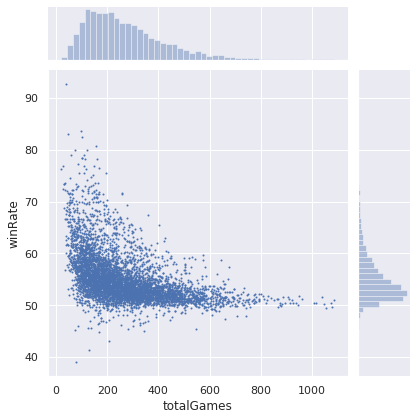

In [3]:
#hide_input
#Correlation between win rate and total games played?
# More games played the more win rate trends toward  50% most players have around 200 games +- 100 and win rates above 50% 

sns.set()
az = sns.jointplot( x="totalGames", y="winRate", s=1, data=all_players)
az.set_xlabel('Win rate %')
az.set_ylabel('Total Games')



- Most players have around 200 games +- 100 
- Most win rates above 50%. 
- More games played the more win rate trends toward  50% 


## What region has the most players

In [4]:
#hide
#Number of players
#format challenger,grandmaster, master,total
KR=[len(all_players[(all_players.region=='Korea') & (all_players.tier == 'CHALLENGER')]),
    len(all_players[(all_players.region=='Korea') & (all_players.tier == 'GRANDMASTER')]),
    len(all_players[(all_players.region=='Korea') & (all_players.tier == 'MASTER')]),
    len(all_players[all_players.region=='Korea'])
   ]
# amount of european players by tier
EU=[len(all_players[(all_players.region=='EuropeWest') & (all_players.tier == 'CHALLENGER')]),
    len(all_players[(all_players.region=='EuropeWest') & (all_players.tier == 'GRANDMASTER')]),
    len(all_players[(all_players.region=='EuropeWest') & (all_players.tier == 'MASTER')]),
   len(all_players[all_players.region=='EuropeWest'])]
#amount of north american players by tier
NA=[len(all_players[(all_players.region=='NorthAmerica') & (all_players.tier == 'CHALLENGER')]),
    len(all_players[(all_players.region=='NorthAmerica') & (all_players.tier == 'GRANDMASTER')]),
    len(all_players[(all_players.region=='NorthAmerica') & (all_players.tier == 'MASTER')]),
   len(all_players[all_players.region=='NorthAmerica'])]


In [5]:
#hide
KR_region,EU_region,NA_region=[],[],[]

for i in range(4): # for labeling purposes
    KR_region.append('Korea')
for i in range(4):
    EU_region.append('Europe West')

for i in range(4):
    NA_region.append('North America')

In [6]:
#hide
player_region=KR_region+EU_region+NA_region
players=KR+EU+NA
player_tier=['CHALLENGER','GRANDMASTER','MASTER','Total','CHALLENGER','GRANDMASTER','MASTER','Total','CHALLENGER','GRANDMASTER','MASTER','Total']


In [7]:
#hide_input
players_df=pd.DataFrame()
players_df['Region']=player_region
players_df['Tier']=player_tier
players_df['Players']=players
players_df

,Region,Tier,Players
0,Korea,CHALLENGER,300
1,Korea,GRANDMASTER,700
2,Korea,MASTER,977
3,Korea,Total,1977
4,Europe West,CHALLENGER,300
5,Europe West,GRANDMASTER,700
6,Europe West,MASTER,1174
7,Europe West,Total,2174
8,North America,CHALLENGER,300
9,North America,GRANDMASTER,699


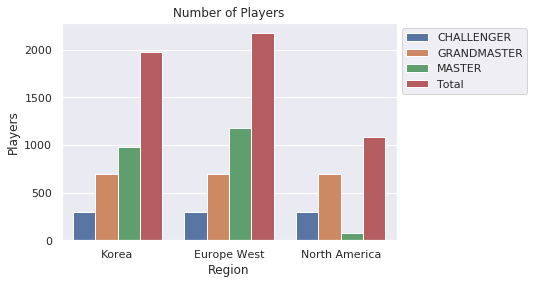

In [8]:
#hide_input
ax = sns.barplot(x="Region", y="Players", hue="Tier", data=players_df)
ax.set_title('Number of Players')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1);

- Challenger is full across all servers
- At 699 NA only region to have under 700 grandmaster players
- EUW and KR have over 10 times as many masters players as NA
- Europe has the most players


## Who plays the most games

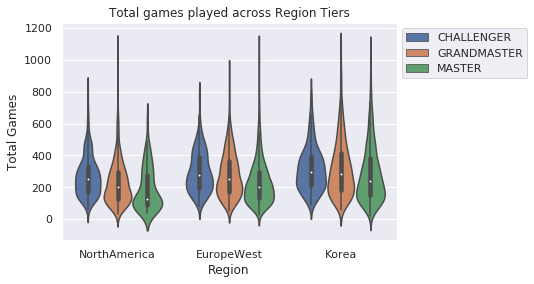

In [9]:
#hide_input
#Violin polot compares win rates across regions
sns.set() 

# Grouped violinplot
ax=sns.violinplot(x="region", y="totalGames", hue="tier", data=all_players)
ax.set_xlabel('Region')
ax.set_ylabel('Total Games')
ax.set_title('Total games played across Region Tiers')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1);
#sns.plt.show()


- The general trend across all regions is for challengers to play the most games followed by grandmasters and masters
- Koreans had the highest average games played followed by Europeans

## How do individual tier win rates vary across regions

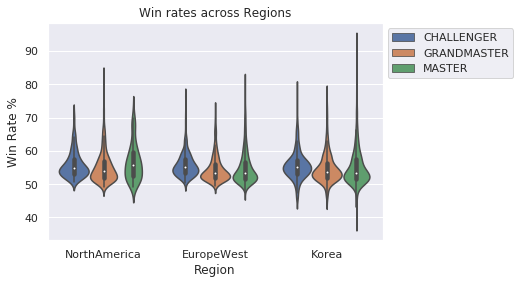

In [10]:
#hide_input 
#Violin polot compares win rates across regions
sns.set() 

# Grouped violinplot
ax2=sns.violinplot(x="region", y="winRate", hue="tier", data=all_players)
ax2.set_xlabel('Region')
ax2.set_ylabel('Win Rate %')
ax2.set_title('Tier Win Rates Across Regions')
# put legend outside of chart
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1);
#sns.plt.show()


- Korean masters players had the highest variance in win rate
- North America is the only region where masters have the highest average win rate. In the other regions challengers have the highest average win rate

## What is the most popular role

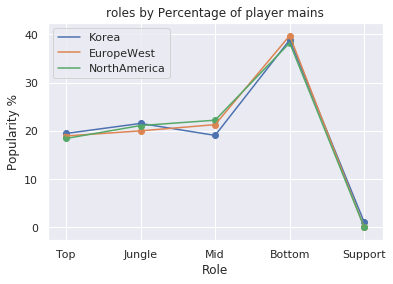

In [11]:
#hide
#Get overall role popularity
roles_title=['Top','Jungle','Mid','Bottom','Support']
tiers=['CHALLENGER','GRANDMASTER','MASTER']
regions=['Korea','EuropeWest','NorthAmerica']

role_popularity={}
for role in roles_title:
    popularity=[]
    for region in regions:   
        popular=round(100*(all_players.winRate[(all_players.region==region)&(all_players.role==role)].count()/len(all_players.winRate[all_players.region==region])),2)
        popularity.append(popular)
        role_popularity[role]=popularity 
role_popularity_frame=pd.DataFrame(role_popularity)

role_popularity_frame
# Korea is 0, Europe West is 1 , North America is 2
# change tostaccked percent bar 
fig2, ax2= plt.subplots()
 
# Choose the height of the blue bars
korea = role_popularity_frame.iloc[0].values
 
# Choose the height of the cyan bars
euw=role_popularity_frame.iloc[1].values
 
na=role_popularity_frame.iloc[2].values



ax2.plot(korea)
ax2.plot(euw)
ax2.plot(na)

#format
ax2.set_title('roles by Percentage of player mains')
ax2.set_ylabel('Popularity %')
ax2.set_xlabel('Role')


ax2.scatter(range(5),korea)
ax2.scatter(range(5),euw)
ax2.scatter(range(5),na)
ax2.set_xticks(range(5))
ax2.set_xticklabels(roles_title)
ax2.legend( (regions));

# The x position of bars


In [12]:
#hide
data = {'Top':[korea[0],euw[0],na[0]],'Jungle':[korea[1],euw[1],na[1]],'Mid':[korea[2],euw[2],na[2]],'Bottom':[korea[3],euw[3],na[3]],'Support':[korea[4],euw[4],na[4]]}
r=[0,1,2]
df=pd.DataFrame(data)

In [13]:
#hide
#popularity Korea is 0, Europe is 1, North America is 2
df

,Top,Jungle,Mid,Bottom,Support
0,19.47,21.55,19.07,38.85,1.06
1,18.95,20.01,21.30,39.74,0.00
2,18.43,21.11,22.22,38.24,0.00


In [14]:
#hide
# From raw value to percentage
totals = [i+j+k+l+m for i,j,k,l,m in zip(df['Top'], df['Jungle'], df['Mid'],df['Bottom'],df['Support'])]
top_bar = [i / j * 100 for i,j in zip(df['Top'], totals)]
jungle_bar = [i / j * 100 for i,j in zip(df['Jungle'], totals)]
mid_bar = [i / j * 100 for i,j in zip(df['Mid'], totals)]
bottom_bar = [i / j * 100 for i,j in zip(df['Bottom'], totals)]
support_bar = [i / j * 100 for i,j in zip(df['Support'], totals)]


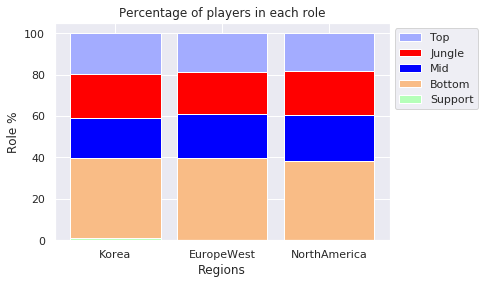

In [15]:
#hide_input
# plot
barWidth = 0.85
r=[0,1,2]

plt.bar(r, top_bar, bottom=[i+j+k+l for i,j,k,l in zip(support_bar, bottom_bar,mid_bar,jungle_bar)], color='#a3acff', edgecolor='white', width=barWidth, label='Top')
plt.bar(r, jungle_bar, bottom=[i+j+k for i,j,k in zip(support_bar, bottom_bar,mid_bar)], color='red', edgecolor='white', width=barWidth, label = 'Jungle')
plt.bar(r, mid_bar, bottom=[i+j for i,j in zip(support_bar, bottom_bar)], color='blue', edgecolor='white', width=barWidth, label='Mid')
plt.bar(r, bottom_bar, bottom=support_bar, color='#f9bc86', edgecolor='white', width=barWidth, label = 'Bottom')
plt.bar(r, support_bar, color='#b5ffb9', edgecolor='white', width=barWidth, label = 'Support')
# SUpport

#Bottom



 
# Custom x axis
plt.xticks(r, regions)
plt.xlabel("Regions")
plt.ylabel('Role %')
plt.title('Percentage of Players in Each Role')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

 
# Show graphic
plt.show()


- Bottom is the most popular role across all servers
- Both Europeans and Koreans have jungle as their second favourite role while Americans prefer mid lane
- Fourth favourite for all regions is Top
- Support is the least favourite role and Korea is the only server with any support players

## What is the win rate of each role

In [16]:
#hide
roles_title=['Top','Jungle','Mid','Bottom','Support']
tiers=['CHALLENGER','GRANDMASTER','MASTER']
regions=['Korea','EuropeWest','NorthAmerica']

overall_role_win={}
region_role_win={}
 
for role in roles_title:
    wins=[]
         
    for region in regions:
        win=round(all_players.winRate[(all_players.region==region)&(all_players.role==role)].mean(),2)
        wins.append(win)
        region_role_win[role]=wins  
role_win_frame=pd.DataFrame(region_role_win)
#'Korea is 0 EU is 1 NA is 2'
role_win_frame

,Top,Jungle,Mid,Bottom,Support
0,55.07,55.48,54.98,55.02,55.54
1,54.95,55.14,55.10,54.86,NaN
2,55.37,55.99,55.50,55.42,NaN


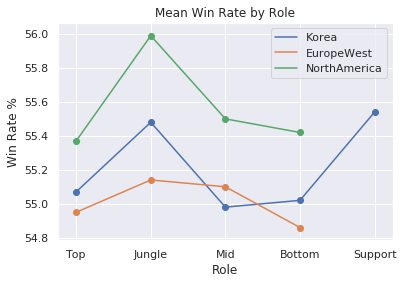

In [18]:
#hide_input
fig, ax= plt.subplots()
 
# Choose the height of the blue bars
korea = role_win_frame.iloc[0].values
 
# Choose the height of the cyan bars
euw=role_win_frame.iloc[1].values
 
na=role_win_frame.iloc[2].values



ax.plot(korea)
ax.plot(euw)
ax.plot(na)

#format
ax.set_title('Mean Win Rate by Role')
ax.set_ylabel('Win Rate %')
ax.set_xlabel('Role')


ax.scatter(range(5),korea)
ax.scatter(range(5),euw)
ax.scatter(range(5),na)
ax.set_xticks(range(5))
ax.set_xticklabels(roles_title)
ax.legend( (regions));


- North American players  have a higher win rate across the board this could be because they play less games
- Korean supports have the highest win rates on their server and second highest win rate overall
- Junglers would have the highest win rates in each server if supports were excluded
- Mid laners have the second highest win rate in North america and Europe but the lowest in Korea

## Conclusions

- Koreans play the most league of legends while Europe has the most players.
- North America seems to have alot of casual players this can be seen from the low number of games played, the incomplete grandmaster tier and the almost empty master tier
- Jungle is probably the best role for climbing the ranked ladder
### Ranking
North American server is a casual place so I'll rank them third
Even though Koreans play more games than Europeans they have higher win rates. Korea is also the most well rounded server. I believe this merits Europe West being second and Korea being first 

# TLDR
Korea > Europe West > North America